In [13]:
import pickle

In [62]:
with open("tag_domain_edgelist.pkl", "rb") as fp:
    edgelist = pickle.load(fp)

# A few tag name are common with domain name, so we need to fix that by adding "_tag" to that
d = set()
t = set()

for i in edgelist:
    d.add(i[1])
    t.add(i[0])

d_t_common = list(d.intersection(t))

# revamp the list
edgelist_ = []
for i in edgelist:
    if i[0] in d_t_common:
        edgelist_.append((i[0] + "_tag", i[1], i[2]))
    else:
        edgelist_.append(i)

edgelist = list(edgelist_)
del edgelist_

# now set the bipartite property for nodes
bp_attrs = {}
for i in edgelist:
    bp_attrs[i[0]] = {'bipartite': 0}
    bp_attrs[i[1]] = {'bipartite': 1}

In [63]:
edgelist[:10]

[('visa', 'academia', 79),
 ('job-search', 'academia', 937),
 ('journals', 'academia', 1490),
 ('journals', 'or', 2),
 ('journals', 'matheducators', 2),
 ('journals', 'stats', 18),
 ('engineering', 'electronics', 46),
 ('engineering', 'academia', 241),
 ('copyright', 'buddhism', 3),
 ('copyright', 'gamedev', 155)]

In [64]:
import networkx as nx
from networkx.algorithms import bipartite

#DomainDomain_ProjectionGraph

In [65]:
BipartiteGraph = nx.Graph()
BipartiteGraph.add_weighted_edges_from(edgelist)
nx.set_node_attributes(BipartiteGraph, bp_attrs)

nx.is_bipartite(BipartiteGraph)

True

In [77]:
edgelist[:10]

[('visa', 'academia', 79),
 ('job-search', 'academia', 937),
 ('journals', 'academia', 1490),
 ('journals', 'or', 2),
 ('journals', 'matheducators', 2),
 ('journals', 'stats', 18),
 ('engineering', 'electronics', 46),
 ('engineering', 'academia', 241),
 ('copyright', 'buddhism', 3),
 ('copyright', 'gamedev', 155)]

In [67]:
nx.is_bipartite(BipartiteGraph)

True

In [68]:
BipartiteGraph.edges(data=True)

EdgeDataView([('visa', 'academia', {'weight': 79}), ('academia', 'job-search', {'weight': 937}), ('academia', 'journals', {'weight': 1490}), ('academia', 'engineering', {'weight': 241}), ('academia', 'copyright', {'weight': 406}), ('academia', 'arxiv', {'weight': 335}), ('academia', 'bibliometrics', {'weight': 149}), ('academia', 'graduate-school', {'weight': 1742}), ('academia', 'germany', {'weight': 262}), ('academia', 'books', {'weight': 295}), ('academia', 'career-path', {'weight': 1050}), ('academia', 'job', {'weight': 491}), ('academia', 'reference-request', {'weight': 272}), ('academia', 'grades', {'weight': 260}), ('academia', 'software', {'weight': 206}), ('academia', 'citations', {'weight': 1695}), ('academia', 'language', {'weight': 174}), ('academia', 'student-exchange', {'weight': 33}), ('academia', 'seminars', {'weight': 72}), ('academia', 'community', {'weight': 33}), ('academia', 'science', {'weight': 140}), ('academia', 'open-access', {'weight': 193}), ('academia', 'te

# Creating adjacency list of the bipartite graph 
(This Adjacency List a list of tuples, were first element of the tuple is a node, say n1, and 2nd element of the tuple is a dictionary which maps all the nodes that n1 is connected to, to the weights with which they are connected)

In [78]:
BipartiteGraph_AdjList = [(n, nbrdict) for n, nbrdict in BipartiteGraph.adjacency()]

In [79]:
BipartiteGraph_AdjList[:10]

[('visa', {'academia': {'weight': 79}}),
 ('academia',
  {'visa': {'weight': 79},
   'job-search': {'weight': 937},
   'journals': {'weight': 1490},
   'engineering': {'weight': 241},
   'copyright': {'weight': 406},
   'arxiv': {'weight': 335},
   'bibliometrics': {'weight': 149},
   'graduate-school': {'weight': 1742},
   'germany': {'weight': 262},
   'books': {'weight': 295},
   'career-path': {'weight': 1050},
   'job': {'weight': 491},
   'reference-request': {'weight': 272},
   'grades': {'weight': 260},
   'software': {'weight': 206},
   'citations': {'weight': 1695},
   'language': {'weight': 174},
   'student-exchange': {'weight': 33},
   'seminars': {'weight': 72},
   'community': {'weight': 33},
   'science': {'weight': 140},
   'open-access': {'weight': 193},
   'teaching': {'weight': 1040},
   'literature': {'weight': 68},
   'reading': {'weight': 85},
   'publishers': {'weight': 243},
   'coursework': {'weight': 248},
   'teaching-assistant': {'weight': 210},
   'postdoc

In [20]:
BipartiteGraph_AdjList[0]

('visa', {'academia': {'weight': 79}})

In [21]:
BipartiteGraph_AdjList[1]

('academia',
 {'visa': {'weight': 79},
  'job-search': {'weight': 937},
  'journals': {'weight': 1490},
  'engineering': {'weight': 241},
  'copyright': {'weight': 406},
  'arxiv': {'weight': 335},
  'bibliometrics': {'weight': 149},
  'graduate-school': {'weight': 1742},
  'germany': {'weight': 262},
  'books': {'weight': 295},
  'career-path': {'weight': 1050},
  'job': {'weight': 491},
  'reference-request': {'weight': 272},
  'grades': {'weight': 260},
  'software': {'weight': 206},
  'citations': {'weight': 1695},
  'language': {'weight': 174},
  'student-exchange': {'weight': 33},
  'seminars': {'weight': 72},
  'community': {'weight': 33},
  'science': {'weight': 140},
  'open-access': {'weight': 193},
  'teaching': {'weight': 1040},
  'literature': {'weight': 68},
  'reading': {'weight': 85},
  'publishers': {'weight': 243},
  'coursework': {'weight': 248},
  'teaching-assistant': {'weight': 210},
  'postdocs': {'weight': 1032},
  'workflow': {'weight': 32},
  'note-taking': {'

In [10]:
len(BipartiteGraph_AdjList)

11145

# Creating Hashmap and Inverse Hashmap

In [80]:
hashed_edgelist = []
hashmap = {}
inverse_hashmap = {}
i = 0
for edgetuple in edgelist:
    if edgetuple[0] not in hashmap:
        hashmap[edgetuple[0]] = i
        inverse_hashmap[i] = edgetuple[0]
        i+=1
    if edgetuple[1] not in hashmap:
        hashmap[edgetuple[1]] = i
        inverse_hashmap[i] = edgetuple[1]
        i+=1
        
#print(hashmap)

In [12]:
hashmap[edgelist[0][0]]  ## edgelist[0][0] = 29108

0

In [16]:
hashmap[edgelist[0][1]]  ## edgelist[0][1] = "academia"

1

In [17]:
hashmap['academia']

1

In [18]:
hashmap[edgelist[1][0]]  ## edgelist[1][0] = 318519

2

In [29]:
hashmap[edgelist[1][1]]  ## edgelist[0][2] = "academia"

1

In [19]:
BipartiteGraph_AdjList[hashmap[edgelist[0][1]]][1].keys() ## All the users edgelist[0][1] i.e 'academia' is connected to

dict_keys(['visa', 'job-search', 'journals', 'engineering', 'copyright', 'arxiv', 'bibliometrics', 'graduate-school', 'germany', 'books', 'career-path', 'job', 'reference-request', 'grades', 'software', 'citations', 'language', 'student-exchange', 'seminars', 'community', 'science', 'open-access', 'teaching', 'literature', 'reading', 'publishers', 'coursework', 'teaching-assistant', 'postdocs', 'workflow', 'note-taking', 'preprint', 'reputation', 'collaboration', 'tools', 'application', 'phd', 'chemistry', 'time-management', 'authorship', 'correspondence', 'personal-name', 'conference', 'advisor', 'mentoring', 'research-process', 'europe', 'online-resource', 'funding', 'salary', 'networking', 'undergraduate', 'recommendation-letter', 'professors', 'graduate-admissions', 'lab-meeting', 'cv', 'education', 'presentation', 'writing', 'email', 'etiquette', 'industry', 'interview', 'research-misconduct', 'international', 'working-time', 'masters', 'peer-review', 'travel', 'research-undergrad

In [20]:
type(list(BipartiteGraph_AdjList[hashmap['buddhism']][1].keys())[1])

str

# Building the domain-domain projection network w.r.t Tags

In [81]:
DomainsList = []
for eachtuple in edgelist :
    if eachtuple[1] not in DomainsList:
        DomainsList.append(eachtuple[1])

In [82]:
DomainsList

['academia',
 'or',
 'matheducators',
 'stats',
 'electronics',
 'buddhism',
 'gamedev',
 'economics',
 'chinese',
 'chemistry',
 'robotics',
 'cs',
 'islam',
 'music',
 'quant',
 'datascience',
 'hermeneutics',
 'hinduism',
 'scicomp',
 'linguistics',
 'physics',
 'russian',
 'french',
 'cseducators',
 'tor',
 'spanish']

In [83]:
ProjectionNetwork = nx.Graph()

In [84]:
ProjectionNetwork.add_nodes_from(DomainsList)

In [111]:
#BipartiteGraph.add_weighted_edges_from(edgelist) edgelist is a list of edgetuples
for i in range(len(DomainsList)-1):
    print(DomainsList[i])
    for j in range(i+1,len(DomainsList)):
        #print(DomainsList[j])
        Domain1 = DomainsList[i]
        Domain2 = DomainsList[j]
        hashedDomain1 = hashmap[Domain1]
        #print(hashedDomain1)
        hashedDomain2 = hashmap[Domain2]
        #print(hashedDomain2)
        #We want to calculate the edgeweight between Domain1 and Domain2 in the projection Network
        
        
        #Find the list of common neighbours between Domain1 and Domain2
        Dict1_of_Neighbours = BipartiteGraph_AdjList[hashedDomain1][1]
        Dict2_of_Neighbours = BipartiteGraph_AdjList[hashedDomain2][1]
        List1 = list(Dict1_of_Neighbours.keys())
        List2 = list(Dict2_of_Neighbours.keys())
        List_of_Common_Neighbours = list(set(List1) & set(List2))
        
        #Each common user contributes something to the total edgeweight between Domain1 and Domain2
        #We find how important each commonuser is to domain1 and to domain2 and multiply the normalised importance
        #to get the contribution to total edgeweight between Domain1 and Domain2 by each commonuser.
        edgeweight = 0
        for commonUser in List_of_Common_Neighbours:
            importance1 = BipartiteGraph_AdjList[hashedDomain1][1][commonUser]['weight']
            importance2 = BipartiteGraph_AdjList[hashedDomain2][1][commonUser]['weight']
            
            sum1 = 0
            for users in List1:
                sum1 += BipartiteGraph_AdjList[hashedDomain1][1][users]['weight']
            sum2 = 0
            for users in List2:
                sum2 += BipartiteGraph_AdjList[hashedDomain2][1][users]['weight']
                
            normalised_importance1 = importance1/sum1
            normalised_importance2 = importance2/sum2
            
            edgeweight += normalised_importance1*normalised_importance1
            
        if edgeweight !=0:
            ProjectionNetwork.add_edge(Domain1, Domain2, weight=edgeweight)

academia
or
matheducators
stats
electronics
buddhism
gamedev
economics
chinese
chemistry
robotics
cs
islam
music
quant
datascience
hermeneutics
hinduism
scicomp
linguistics
physics
russian
french
cseducators
tor


In [112]:
ProjectionNetwork.nodes()

NodeView(('academia', 'or', 'matheducators', 'stats', 'electronics', 'buddhism', 'gamedev', 'economics', 'chinese', 'chemistry', 'robotics', 'cs', 'islam', 'music', 'quant', 'datascience', 'hermeneutics', 'hinduism', 'scicomp', 'linguistics', 'physics', 'russian', 'french', 'cseducators', 'tor', 'spanish'))

In [113]:
nx.write_gml(ProjectionNetwork, "DomainDomainProjection_wrtTAGS.gml")

Done in few seconds

In [87]:
edges = ProjectionNetwork.edges()
pos = nx.spring_layout(ProjectionNetwork)

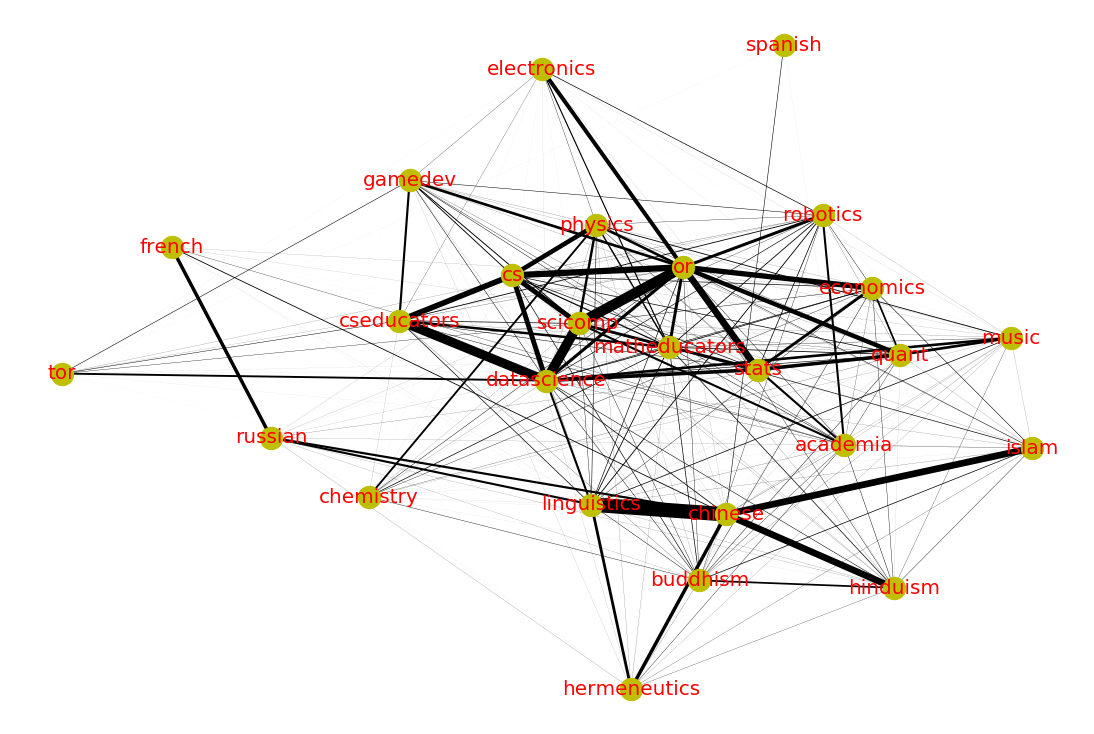

In [88]:
import matplotlib.pyplot as plt

weights = [ProjectionNetwork[u][v]['weight']*500 for u,v in edges]

plt.figure(figsize=(15,10))
nx.draw(ProjectionNetwork, edges=edges, width=weights, with_labels = True, node_size = 500, node_color = 'y', font_color = 'r', font_size = 20)
plt.savefig('DomainDomainProjection_TAGS.png')
plt.show()

# Running LOUVAIN Community Detection Algorithm

In [89]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [90]:
from community import community_louvain
partition = community_louvain.best_partition(ProjectionNetwork, resolution = 1)

In [91]:
partition

{'academia': 0,
 'or': 0,
 'matheducators': 0,
 'stats': 0,
 'electronics': 0,
 'buddhism': 1,
 'gamedev': 2,
 'economics': 0,
 'chinese': 1,
 'chemistry': 2,
 'robotics': 0,
 'cs': 2,
 'islam': 1,
 'music': 2,
 'quant': 0,
 'datascience': 2,
 'hermeneutics': 1,
 'hinduism': 1,
 'scicomp': 2,
 'linguistics': 1,
 'physics': 2,
 'russian': 1,
 'french': 1,
 'cseducators': 2,
 'tor': 2,
 'spanish': 1}

In [93]:
community_louvain.modularity(partition, ProjectionNetwork, weight='weight')

0.31237335958402845

# Partition on Projection created using Jaccard Coefficient

In [94]:
from networkx.algorithms import bipartite

In [95]:
BipartiteGraphNodes = []
for edgetuple in edgelist:
    if edgetuple[1] not in BipartiteGraphNodes:
        BipartiteGraphNodes.append(edgetuple[1])

In [96]:
BipartiteGraphNodes

['academia',
 'or',
 'matheducators',
 'stats',
 'electronics',
 'buddhism',
 'gamedev',
 'economics',
 'chinese',
 'chemistry',
 'robotics',
 'cs',
 'islam',
 'music',
 'quant',
 'datascience',
 'hermeneutics',
 'hinduism',
 'scicomp',
 'linguistics',
 'physics',
 'russian',
 'french',
 'cseducators',
 'tor',
 'spanish']

In [97]:
BipartiteGraph.edges()

EdgeView([('visa', 'academia'), ('academia', 'job-search'), ('academia', 'journals'), ('academia', 'engineering'), ('academia', 'copyright'), ('academia', 'arxiv'), ('academia', 'bibliometrics'), ('academia', 'graduate-school'), ('academia', 'germany'), ('academia', 'books'), ('academia', 'career-path'), ('academia', 'job'), ('academia', 'reference-request'), ('academia', 'grades'), ('academia', 'software'), ('academia', 'citations'), ('academia', 'language'), ('academia', 'student-exchange'), ('academia', 'seminars'), ('academia', 'community'), ('academia', 'science'), ('academia', 'open-access'), ('academia', 'teaching'), ('academia', 'literature'), ('academia', 'reading'), ('academia', 'publishers'), ('academia', 'coursework'), ('academia', 'teaching-assistant'), ('academia', 'postdocs'), ('academia', 'workflow'), ('academia', 'note-taking'), ('academia', 'preprint'), ('academia', 'reputation'), ('academia', 'collaboration'), ('academia', 'tools'), ('academia', 'application'), ('aca

In [98]:
nx.is_bipartite(BipartiteGraph)

True

In [99]:
Jaccardbased_Projection = bipartite.overlap_weighted_projected_graph(BipartiteGraph, BipartiteGraphNodes)

In [100]:
Jaccardbased_Projection.nodes()

NodeView(('academia', 'or', 'matheducators', 'stats', 'electronics', 'buddhism', 'gamedev', 'economics', 'chinese', 'chemistry', 'robotics', 'cs', 'islam', 'music', 'quant', 'datascience', 'hermeneutics', 'hinduism', 'scicomp', 'linguistics', 'physics', 'russian', 'french', 'cseducators', 'tor', 'spanish'))

In [101]:
from community import community_louvain

Jacpartition = community_louvain.best_partition(Jaccardbased_Projection, resolution = 1)

In [102]:
Jacpartition

{'academia': 0,
 'or': 1,
 'matheducators': 0,
 'stats': 1,
 'electronics': 2,
 'buddhism': 3,
 'gamedev': 2,
 'economics': 1,
 'chinese': 3,
 'chemistry': 2,
 'robotics': 2,
 'cs': 1,
 'islam': 3,
 'music': 2,
 'quant': 1,
 'datascience': 1,
 'hermeneutics': 3,
 'hinduism': 3,
 'scicomp': 1,
 'linguistics': 3,
 'physics': 2,
 'russian': 3,
 'french': 3,
 'cseducators': 0,
 'tor': 2,
 'spanish': 3}

In [103]:
community_louvain.modularity(Jacpartition, Jaccardbased_Projection, weight='weight')

0.16973838031846972

## Degree Distribution of Domain-Domain Network


In [104]:
ProjectionNetwork.degree()

DegreeView({'academia': 25, 'or': 24, 'matheducators': 23, 'stats': 25, 'electronics': 25, 'buddhism': 24, 'gamedev': 24, 'economics': 24, 'chinese': 25, 'chemistry': 23, 'robotics': 22, 'cs': 23, 'islam': 24, 'music': 24, 'quant': 24, 'datascience': 24, 'hermeneutics': 23, 'hinduism': 24, 'scicomp': 23, 'linguistics': 25, 'physics': 25, 'russian': 23, 'french': 20, 'cseducators': 23, 'tor': 23, 'spanish': 8})

In [105]:
ProjectionNetwork.degree(weight = 'weight')

DegreeView({'academia': 0.022279930666509653, 'or': 0.10915245968203759, 'matheducators': 0.041532772792346025, 'stats': 0.0509324943609697, 'electronics': 0.013915087525196284, 'buddhism': 0.016601788690562003, 'gamedev': 0.0202704455352033, 'economics': 0.030526908154339383, 'chinese': 0.07266338392108736, 'chemistry': 0.009307253195196354, 'robotics': 0.02429676963622352, 'cs': 0.06397211434363781, 'islam': 0.02160668629082377, 'music': 0.01771570993671322, 'quant': 0.03350347807832004, 'datascience': 0.08494965612016131, 'hermeneutics': 0.015869524479101053, 'hinduism': 0.02487897379423331, 'scicomp': 0.07665920092754598, 'linguistics': 0.055351241436840816, 'physics': 0.0331542103158299, 'russian': 0.017383627296586334, 'french': 0.009660494796458152, 'cseducators': 0.0476095057320365, 'tor': 0.00722877475542373, 'spanish': 0.0011852145908374282})

In [106]:
weightededges = list(ProjectionNetwork.degree(weight = 'weight'))
weightededges

[('academia', 0.022279930666509653),
 ('or', 0.10915245968203759),
 ('matheducators', 0.041532772792346025),
 ('stats', 0.0509324943609697),
 ('electronics', 0.013915087525196284),
 ('buddhism', 0.016601788690562003),
 ('gamedev', 0.0202704455352033),
 ('economics', 0.030526908154339383),
 ('chinese', 0.07266338392108736),
 ('chemistry', 0.009307253195196354),
 ('robotics', 0.02429676963622352),
 ('cs', 0.06397211434363781),
 ('islam', 0.02160668629082377),
 ('music', 0.01771570993671322),
 ('quant', 0.03350347807832004),
 ('datascience', 0.08494965612016131),
 ('hermeneutics', 0.015869524479101053),
 ('hinduism', 0.02487897379423331),
 ('scicomp', 0.07665920092754598),
 ('linguistics', 0.055351241436840816),
 ('physics', 0.0331542103158299),
 ('russian', 0.017383627296586334),
 ('french', 0.009660494796458152),
 ('cseducators', 0.0476095057320365),
 ('tor', 0.00722877475542373),
 ('spanish', 0.0011852145908374282)]

In [107]:
weightededges.sort(key = lambda x: x[1])

In [108]:
weightededges

[('spanish', 0.0011852145908374282),
 ('tor', 0.00722877475542373),
 ('chemistry', 0.009307253195196354),
 ('french', 0.009660494796458152),
 ('electronics', 0.013915087525196284),
 ('hermeneutics', 0.015869524479101053),
 ('buddhism', 0.016601788690562003),
 ('russian', 0.017383627296586334),
 ('music', 0.01771570993671322),
 ('gamedev', 0.0202704455352033),
 ('islam', 0.02160668629082377),
 ('academia', 0.022279930666509653),
 ('robotics', 0.02429676963622352),
 ('hinduism', 0.02487897379423331),
 ('economics', 0.030526908154339383),
 ('physics', 0.0331542103158299),
 ('quant', 0.03350347807832004),
 ('matheducators', 0.041532772792346025),
 ('cseducators', 0.0476095057320365),
 ('stats', 0.0509324943609697),
 ('linguistics', 0.055351241436840816),
 ('cs', 0.06397211434363781),
 ('chinese', 0.07266338392108736),
 ('scicomp', 0.07665920092754598),
 ('datascience', 0.08494965612016131),
 ('or', 0.10915245968203759)]

In [109]:
x = []
y = []
labels = []
for eachtuple in weightededges:
    x.append(eachtuple[0])
    labels.append(eachtuple[0])
    y.append(eachtuple[1])

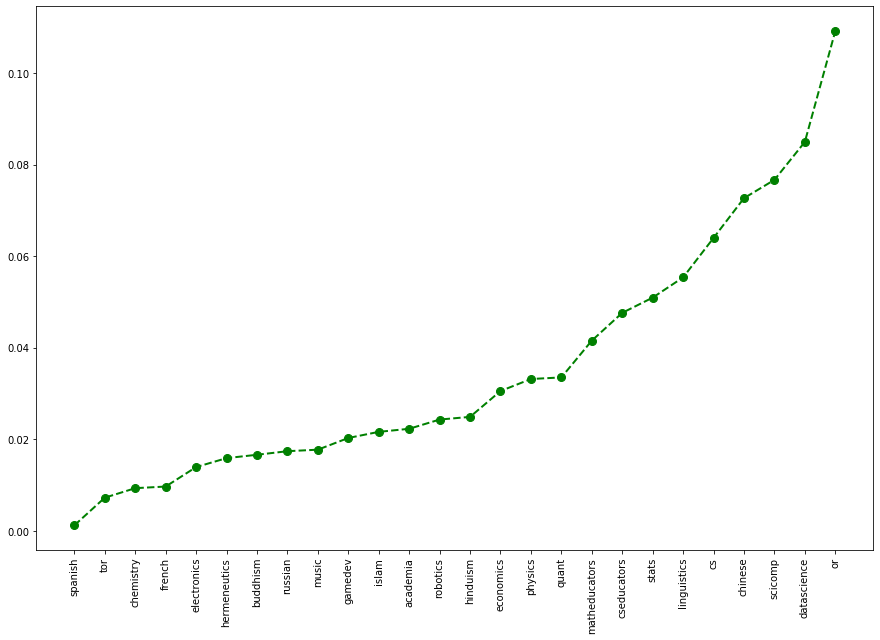

<Figure size 432x288 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
#plt.plot(x,y) #'bo', markersize = 4, linewidth=2)
plt.plot(x, y, 'go--', linewidth=2, markersize=8)
plt.xticks(x, labels, rotation='vertical')
plt.show()
plt.savefig('DegreeDistribution_wrtTags.png')

## Fitting Domain-Domain Projection network to Weighted Nested SBM

In [144]:
import graph_tool.all as gt

In [145]:
g = gt.load_graph("DomainDomainProjection_wrtTAGS.gml")

In [146]:
g

<Graph object, undirected, with 26 vertices and 300 edges at 0x1527f3710>

In [154]:
state = gt.minimize_nested_blockmodel_dl(g, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [155]:
import matplotlib
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(edge_color=gt.prop_to_size(g.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="Weighted_NestedSBM_on_DomainProjection_wrtTAGS.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527f3710, at 0x152807410>,
 <Graph object, directed, with 40 vertices and 39 edges at 0x151938550>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x151938550, at 0x151938110>)

<Figure size 432x288 with 0 Axes>

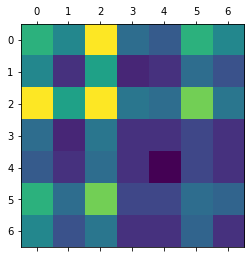

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
m = state.levels[0].get_matrix()
plt.figure()
plt.matshow(m.todense())

In [125]:
m.todense()

matrix([[20., 15., 30., 12., 10., 20., 15.],
        [15.,  6., 18.,  5.,  6., 12.,  9.],
        [30., 18., 30., 13., 12., 24., 13.],
        [12.,  5., 13.,  6.,  6.,  8.,  6.],
        [10.,  6., 12.,  6.,  2.,  8.,  6.],
        [20., 12., 24.,  8.,  8., 12., 11.],
        [15.,  9., 13.,  6.,  6., 11.,  6.]])

## Fitting Domain-Domain Projection network to UnWeighted Nested SBM

In [126]:
g

<Graph object, undirected, with 26 vertices and 300 edges at 0x14f236a50>

In [156]:
state = gt.minimize_nested_blockmodel_dl(g)

In [157]:
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(vertex_text=vprop_label,edge_gradient=[], output="UNWEIGHTED_NestedSBM_DomainProjection_wrtTAGS.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527f3710, at 0x1528077d0>,
 <Graph object, directed, with 27 vertices and 26 edges at 0x11f2f94d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x11f2f94d0, at 0x15192f750>)

## Fitting Domain-Domain Projection network to Weighted Non-Nested SBM

In [135]:
g

<Graph object, undirected, with 26 vertices and 300 edges at 0x14f236a50>

In [160]:
state = gt.minimize_blockmodel_dl(g, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [161]:
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(vertex_text=vprop_label,edge_gradient=[], output="Weighted_NonNestedSBM_DomainProjection_wrtTAGS.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527f3710, at 0x1519383d0>

## Fitting Domain-Domain Projection network to Unweighted Non-Nested SBM


In [138]:
g

<Graph object, undirected, with 26 vertices and 300 edges at 0x14f236a50>

In [162]:
state = gt.minimize_blockmodel_dl(g) #, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [163]:
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(vertex_text=vprop_label,edge_gradient=[], output="Unweighted_NonNestedSBM_DomainProjection_wrtTAGS.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527f3710, at 0x136acb5d0>

# Now degree corrected


# weighted nested w.r.t Tags (degree corrected)

In [182]:
state = gt.minimize_nested_blockmodel_dl(g, deg_corr = True, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [183]:
import matplotlib
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(edge_color=gt.prop_to_size(g.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.Blues, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="DegCorrWeightedNestedSBM_DomainProjection_wrtTAGS.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527f3710, at 0x152839b50>,
 <Graph object, directed, with 36 vertices and 35 edges at 0x1527d9a10>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527d9a10, at 0x121cf57d0>)

In [177]:
state = gt.minimize_nested_blockmodel_dl(g) #, deg_corr = True, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [178]:
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(vertex_text=vprop_label,edge_gradient=[], output="DegCorrUnweightedNestedSBM_DomainProjection_wrtTAGS.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1527f3710, at 0x11e207110>,
 <Graph object, directed, with 27 vertices and 26 edges at 0x1234e3610>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1234e3610, at 0x1527e3d10>)

## Fitting Jaccard based Domain-Domain Projection network to Weighted Nested SBM (wrt Tags)


In [129]:
Jaccardbased_Projection

In [130]:
nx.write_gml(Jaccardbased_Projection, "JaccardBased_DomainDomainProjection_wrtTAGS.gml")

In [131]:
Jaccard_G = gt.load_graph("JaccardBased_DomainDomainProjection_wrtTAGS.gml")

In [164]:
Jaccard_G

<Graph object, undirected, with 26 vertices and 300 edges at 0x151940150>

In [165]:
Jaccard_state = gt.minimize_nested_blockmodel_dl(Jaccard_G, state_args=dict(recs=[Jaccard_G.ep.weight], rec_types=["real-exponential"]))

In [180]:
import matplotlib
vprop_label = Jaccard_G.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}
Jaccard_state.draw(edge_color=gt.prop_to_size(Jaccard_G.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.Blues, .6), eorder=Jaccard_G.ep.weight, edge_pen_width=gt.prop_to_size(Jaccard_G.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="JaccardBased_WeightedNestedSBM_DomainProjection_wrtTAGS.svg")
#Jaccard_state.draw(edge_color=Jaccard_G.ep.weight, vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=Jaccard_G.ep.weight, edge_pen_width=gt.prop_to_size(Jaccard_G.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="JaccardBased_WeightedNestedSBM_DomainProjection_wrtTAGS.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x151940150, at 0x11f150b10>,
 <Graph object, directed, with 29 vertices and 28 edges at 0x11f624190>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x11f624190, at 0x1517d4a50>)

In [ ]:
# Jaccard_state.draw(edge_color=gt.prop_to_size(Jaccard_G.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=Jaccard_G.ep.weight, edge_pen_width=gt.prop_to_size(Jaccard_G.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="JaccardBased_WeightedNestedSBM_DomainProjection_wrtTAGS.svg")

# Comparison between Degree Corrected and Non degree corrected by comparing minimum description length (we will have nested, weighted and our metric fixed)

# 1. Non degree corrected

In [184]:
g

<Graph object, undirected, with 26 vertices and 300 edges at 0x1527f3710>

In [185]:
Sum_state_NDCEntropy = 0
for i in range(50):
    print(i)
    state_ndc =  gt.minimize_nested_blockmodel_dl(g, deg_corr=False,state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))
    Sum_state_NDCEntropy += state_ndc.entropy()
avg_ndc = Sum_state_NDCEntropy/50

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [186]:
print("Non-degree-corrected DL:\t", avg_ndc)

Non-degree-corrected DL:	 -1567.2519723710823


# 2. Degree corrected

In [187]:
Sum_state_DCEntropy = 0
for i in range(50):
    print(i)
    state_dc =  gt.minimize_nested_blockmodel_dl(g, deg_corr=True,state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))
    Sum_state_DCEntropy += state_dc.entropy()
avg_dc = Sum_state_DCEntropy/50

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [188]:
print("Degree-corrected DL:\t", avg_dc)

Degree-corrected DL:	 -1555.7597744531054


# Statistical significance

In [190]:
print(u"ln \u039b: ", avg_ndc - avg_dc)

ln Λ:  -11.49219791797691


# The precise threshold that should be used to decide when to reject a hypothesis is subjective and context-dependent, but the value above implies that the nondegree-corrected fit is around e^11.5 ≈ 10^5 times more likely than the degree corrected one, and hence it can be safely concluded that it provides a substantially better fit.

# Hence, performing "NONdegree corrected" Weighted Nested SBM on DomainDomain Projection w.r.t USERS

In [191]:
g = gt.load_graph("DomainDomainProjection_wrtTAGS.gml")

In [192]:
g

<Graph object, undirected, with 26 vertices and 300 edges at 0x151948410>

In [205]:
state = gt.minimize_nested_blockmodel_dl(g, deg_corr = False, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [206]:
import matplotlib
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(edge_color=g.ep.weight, vertex_text=vprop_label, ecmap=(matplotlib.cm.Blues, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="NonDegCorrWeightedNestedSBM_DomainProjection_wrtTAGS.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x151948410, at 0x1527fe410>,
 <Graph object, directed, with 34 vertices and 33 edges at 0x151943210>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x151943210, at 0x1527fec50>)